# **SUPERMARKET SALES**

# **Importing the Packages**

In [ ]:
import pandas as pd
import numpy as np
import sklearn.metrics
import seaborn as sns
import tensorflow as tf
import matplotlib.pyplot as plt
from math import sqrt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import mean_squared_error,r2_score,mean_absolute_error
from sklearn.neural_network import MLPRegressor
from keras.models import Sequential
from keras.layers import Dense
from keras.callbacks import EarlyStopping
import warnings
warnings.filterwarnings('ignore')

# **Data Collection and Analysis**

In [ ]:
# loading the diabetes dataset to a pandas DataFrame
df = pd.read_csv("/content/Stores.csv")


In [ ]:
# printing the first 5 rows of the dataset
df.head()

,Store_ID,Store_Area,Items_Available,Daily_Customer_Count,Store_Sales
0,1,1659,1961,530,66490
1,2,1461,1752,210,39820
2,3,1340,1609,720,54010
3,4,1451,1748,620,53730
4,5,1770,2111,450,46620


In [ ]:
# number of rows and Columns in this dataset
df.shape

(896, 5)

In [ ]:
# getting the statistical measures of the data
df.describe()

,Store_ID,Store_Area,Items_Available,Daily_Customer_Count,Store_Sales
count,896.000000,896.000000,896.000000,896.000000,896.000000
mean,448.500000,1485.409598,1782.035714,786.350446,59351.305804
std,258.797218,250.237011,299.872053,265.389281,17190.741895
min,1.000000,775.000000,932.000000,10.000000,14920.000000
25%,224.750000,1316.750000,1575.500000,600.000000,46530.000000
50%,448.500000,1477.000000,1773.500000,780.000000,58605.000000
75%,672.250000,1653.500000,1982.750000,970.000000,71872.500000
max,896.000000,2229.000000,2667.000000,1560.000000,116320.000000


# **Checking for missing values**

In [ ]:
#Check for any null values
df.isnull().sum()

Store_ID                0
Store_Area              0
Items_Available         0
Daily_Customer_Count    0
Store_Sales             0
dtype: int64

<Axes: >

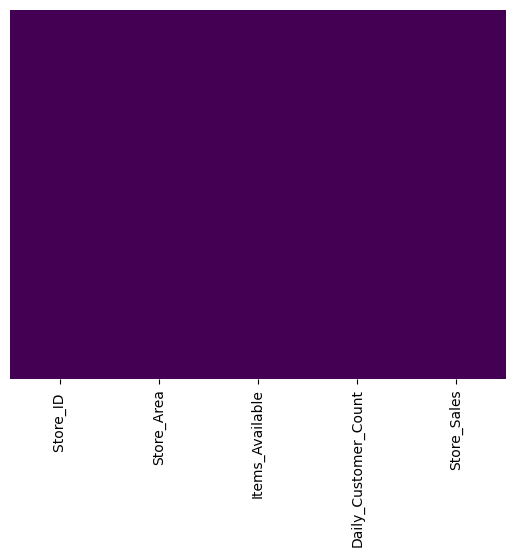

In [ ]:
sns.heatmap(df.isnull(),yticklabels=False,cbar=False,cmap='viridis')

In [ ]:
# Remove missing values
df.dropna(inplace=True)

# **Data Standardization**

In [ ]:
# Scale numerical features
scaler = StandardScaler()
numerical_features = ["Store_Area", "Items_Available", "Daily_Customer_Count"]
df[numerical_features] = scaler.fit_transform(df[numerical_features])

# **Correlation Matrix**

<Axes: >

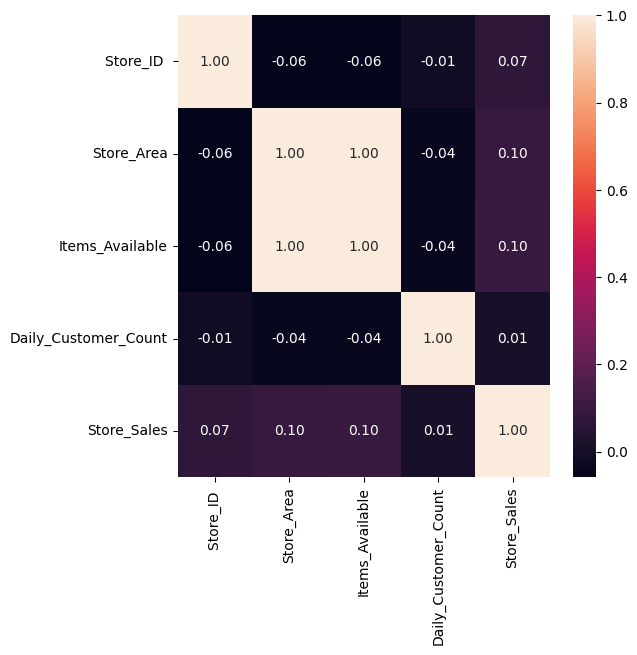

In [ ]:
correlation = df.corr()
plt.figure(figsize=(6,6))
sns.heatmap(df.corr(),annot=True, fmt = ".2f")

# **Scatter Plot**

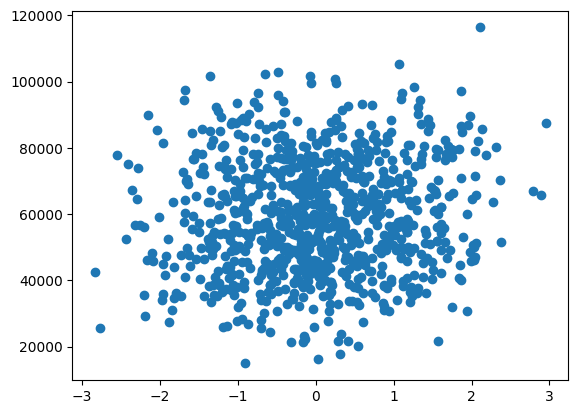

In [ ]:
plt.scatter(df['Items_Available'],df['Store_Sales'])

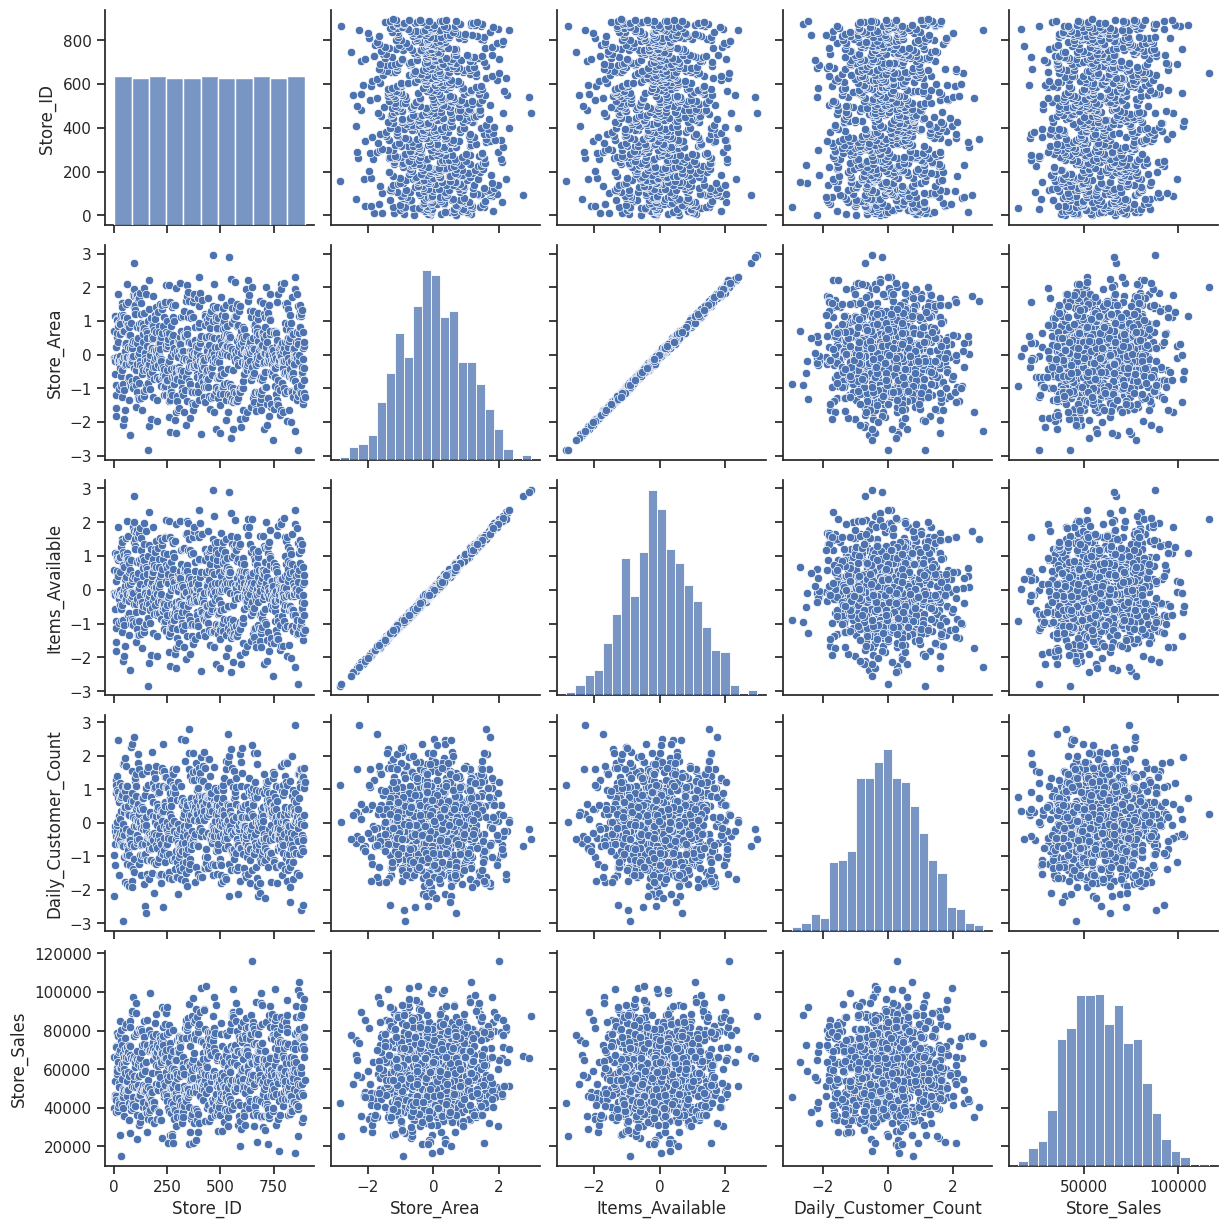

In [ ]:
sns.set_theme(style="ticks",palette='deep')
sns.pairplot(df)

# **Distribution Plot**

<Axes: xlabel='Store_Sales', ylabel='Density'>

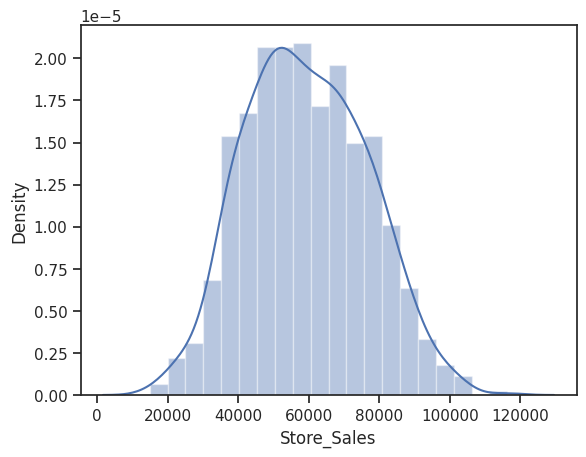

In [ ]:
sns.distplot(df['Store_Sales'])

# **Train Test Split**

In [ ]:
# Split the dataset into input features (X) and target variable (y)
X = df[['Store_Area', 'Items_Available', 'Daily_Customer_Count']]
y = df['Store_Sales']

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
# Normalize the input features using standard scaling
sc = StandardScaler()
X = sc.fit_transform(X)

# **Training the Model using Neural Network Models**

In [ ]:
# Define the neural network architecture
model = tf.keras.Sequential([
    tf.keras.layers.Dense(64, input_shape=(X_train.shape[1]), activation='relu'),
    tf.keras.layers.Dense(32, activation='relu'),
    tf.keras.layers.Dense(1)
])


# Compile the model with mean squared error loss function and Adam optimizer
model.compile(loss='mean_squared_error', optimizer='adam')


# Train the model with early stopping and checkpoint saving
callback = [tf.keras.callbacks.EarlyStopping(patience=10, monitor='val_loss'),
            tf.keras.callbacks.ModelCheckpoint(filepath='best_model.h5', monitor='val_loss', save_best_only=True)]


history = model.fit(X_train, y_train, epochs=100, validation_split=0.2, batch_size=32, callbacks=callback)


# Evaluate the model on the test set
model.evaluate(X_test, y_test)


# Predict on the test set
y_pred = model.predict(X_test)


# Calculate the mean squared error
mse = mean_squared_error(y_test, y_pred)
print("Mean Squared Error: ", mse)
mae = mean_absolute_error(y_test, y_pred)
print("Mean Absolute Error: ", mae)
rms = np.sqrt(mean_squared_error(y_test, y_pred))
print("RMSE:", rms)
r_squared = r2_score(y_test, y_pred)
print("R-squared:", r_squared)


Epoch 1/100
18/18 [==============================] - 1s 13ms/step - loss: 3838002688.0000 - val_loss: 3658696448.0000
Epoch 2/100
18/18 [==============================] - 0s 5ms/step - loss: 3837897216.0000 - val_loss: 3658577664.0000
Epoch 3/100
18/18 [==============================] - 0s 5ms/step - loss: 3837748992.0000 - val_loss: 3658400768.0000
Epoch 4/100
18/18 [==============================] - 0s 5ms/step - loss: 3837519104.0000 - val_loss: 3658122752.0000
Epoch 5/100
18/18 [==============================] - 0s 6ms/step - loss: 3837161728.0000 - val_loss: 3657697024.0000
Epoch 6/100
18/18 [==============================] - 0s 6ms/step - loss: 3836628736.0000 - val_loss: 3657063424.0000
Epoch 7/100
18/18 [==============================] - 0s 5ms/step - loss: 3835845376.0000 - val_loss: 3656177664.0000
Epoch 8/100
18/18 [==============================] - 0s 6ms/step - loss: 3834774272.0000 - val_loss: 3654971136.0000
Epoch 9/100
18/18 [==============================] - 0s 6ms/ste

6/6 [==============================] - 0s 3ms/step
Mean Squared Error:  760264250.5940201
Mean Absolute Error:  23279.20642361111
RMSE: 27572.88977590162
R-squared: -1.7945970186996822


In [ ]:
# Predict on new data
new_data = np.array([[20, 500, 100], [10, 300, 50]])
new_data = scaler.transform(new_data)
predictions = model.predict(new_data)
print("Predicted Data", predictions)


1/1 [==============================] - 0s 66ms/step
Predicted Data [[125509.99]
 [133437.64]]


# **Using MLP Regressor**

In [ ]:
# Initialize the MLP regressor model
mlp_regressor = MLPRegressor(hidden_layer_sizes=(64, 32),activation='relu',solver='adam', max_iter=1000, random_state=42)

# Train the model on the training set
mlp_regressor.fit(X_train, y_train)

# Predict the target values for the test set
y_pred = mlp_regressor.predict(X_test)

# Evaluate the performance of the model using mean squared error
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
rms = np.sqrt(mean_squared_error(y_test, y_pred))
r_squared = r2_score(y_test, y_pred)

print(f"Mean Squared Error: {mse:.2f}")
print(f"Mean Absolute Error: {mae:.2f}")
print("RMSE:", rms)
print("R-squared:", r_squared)

# Predict on new data
new_data = np.array([[20, 500, 100], [10, 300, 50]])
new_data = scaler.transform(new_data)
predictions = mlp_regressor.predict(new_data)
print("Predicted Data", predictions)

Mean Squared Error: 328264416.92
Mean Absolute Error: 15073.18
RMSE: 18118.068796589687
R-squared: -0.20664198026849512
Predicted Data [129708.77530361 136755.9021715 ]


In [ ]:
# Initialize the MLP regressor model
mlp_regressor1 = MLPRegressor(hidden_layer_sizes=(64, 32),activation='tanh', max_iter=1000, random_state=42)

# Train the model on the training set
mlp_regressor1.fit(X_train, y_train)

# Predict the target values for the test set
y_pred = mlp_regressor1.predict(X_test)

# Evaluate the performance of the model using mean squared error
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
rms = np.sqrt(mean_squared_error(y_test, y_pred))
r_squared = r2_score(y_test, y_pred)
print(f"Mean Squared Error: {mse:.2f}")
print(f"Mean Absolute Error: {mae:.2f}")
print("RMSE:", rms)
print("R-squared:", r_squared)

# Predict on new data
new_data = np.array([[20, 500, 100], [10, 300, 50]])
new_data = scaler.transform(new_data)
predictions = mlp_regressor.predict(new_data)
print("Predicted Data", predictions)

Mean Squared Error: 3863509449.45
Mean Absolute Error: 59928.80
RMSE: 62157.135145123175
R-squared: -13.201577912827679
Predicted Data [129708.77530361 136755.9021715 ]


# **Applying Fuzzy Logic**

In [ ]:
!pip install -U scikit-fuzzy
import skfuzzy as fuzz
from skfuzzy import control as ctrl

In [ ]:
# Create fuzzy variables for Store_Area, Items_Available, Daily_Customer_Count, and Store_Sales
store_area = ctrl.Antecedent(np.arange(0, 11, 1), 'Store_Area')
items_available = ctrl.Antecedent(np.arange(0, 11, 1), 'Items_Available')
daily_customer_count = ctrl.Antecedent(np.arange(0, 11, 1), 'Daily_Customer_Count')
store_sales = ctrl.Consequent(np.arange(0, 101, 1), 'Store_Sales')

# Define fuzzy membership functions for each variable
store_area['Small'] = fuzz.trimf(store_area.universe, [0, 0, 5])
store_area['Medium'] = fuzz.trimf(store_area.universe, [0, 5, 10])
store_area['Large'] = fuzz.trimf(store_area.universe, [5, 10, 10])

items_available['Few'] = fuzz.trimf(items_available.universe, [0, 0, 5])
items_available['Average'] = fuzz.trimf(items_available.universe, [0, 5, 10])
items_available['Many'] = fuzz.trimf(items_available.universe, [5, 10, 10])

daily_customer_count['Low'] = fuzz.trimf(daily_customer_count.universe, [0, 0, 5])
daily_customer_count['Medium'] = fuzz.trimf(daily_customer_count.universe, [0, 5, 10])
daily_customer_count['High'] = fuzz.trimf(daily_customer_count.universe, [5, 10, 10])

store_sales['Low'] = fuzz.trimf(store_sales.universe, [0, 0, 50])
store_sales['Medium'] = fuzz.trimf(store_sales.universe, [0, 50, 100])
store_sales['High'] = fuzz.trimf(store_sales.universe, [50, 100, 100])

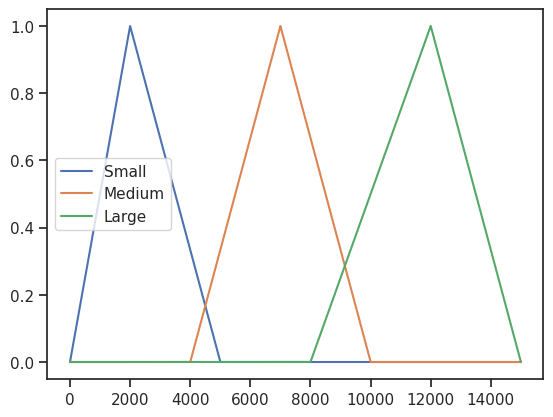

In [ ]:
# Define the universe of discourse for Store_Area
x_store_area = np.arange(0, 15001, 1)

# Define fuzzy sets for Small, Medium, and Large stores
small_store = fuzz.trimf(x_store_area, [0, 2000, 5000])
medium_store = fuzz.trimf(x_store_area, [4000, 7000, 10000])
large_store = fuzz.trimf(x_store_area, [8000, 12000, 15000])

# Visualize the membership functions
plt.plot(x_store_area, small_store, label='Small')
plt.plot(x_store_area, medium_store, label='Medium')
plt.plot(x_store_area, large_store, label='Large')
plt.legend()
plt.show()


In [ ]:
# Define the rules for the fuzzy system
rule1 = ctrl.Rule(store_area['Small'] & items_available['Few'], store_sales['Low'])
rule2 = ctrl.Rule(store_area['Medium'] & items_available['Many'] & daily_customer_count['High'], store_sales['High'])
rule3 = ctrl.Rule(store_area['Small'] & items_available['Few'], store_sales['Low'])
rule4 = ctrl.Rule(store_area['Medium'] & items_available['Many'] & daily_customer_count['High'], store_sales['High'])
rule5 = ctrl.Rule(store_area['Large'] & items_available['Average'], store_sales['Medium'])
rule6 = ctrl.Rule(store_area['Small'] & items_available['Many'] & daily_customer_count['Low'], store_sales['Low'])
rule7 = ctrl.Rule(store_area['Large'] & items_available['Few'] & daily_customer_count['High'], store_sales['Medium'])


# Create the control system simulation
store_sales_ctrl = ctrl.ControlSystem([rule1, rule2,rule3,rule4,rule5,rule6,rule7])
store_sales_sim = ctrl.ControlSystemSimulation(store_sales_ctrl)

# Pass inputs to the control system simulation
store_sales_sim.input['Store_Area'] = 3
store_sales_sim.input['Items_Available'] = 7
store_sales_sim.input['Daily_Customer_Count'] = 9

# Compute the output for the control system simulation
store_sales_sim.compute()

# Print the output of the control system simulation
print("The predicted Store Sales is", store_sales_sim.output['Store_Sales'], "out of 100.")

The predicted Store Sales is 79.58333333333327 out of 100.
